In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
titanic = sns.load_dataset("titanic")
flights = sns.load_dataset("flights")
dowjones = sns.load_dataset("dowjones")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
healthexp = sns.load_dataset("healthexp").sort_values("Year")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

# Statistical operations

- 데이터 시각화에는 종종 집계 또는 추정 단계가 포함되는데, 이때 여러 데이터 포인트를 평균 또는 중앙값과 같은 요약 통계량으로 줄이는 것이 일반적입니다. 
- 요약 통계량을 보여줄 때, 해당 통계량이 기초 데이터 포인트를 얼마나 잘 대표하는지에 대한 시각적인 단서를 제공하는 오차 막대를 추가하는 것이 적절합니다.

- Seaborn의 여러 함수들은 전체 데이터셋을 제공하면 요약 통계량과 오차 막대 모두를 자동으로 계산합니다. 
- 이 장에서는 어떻게 오차 막대가 표시되는지를 제어하고 seaborn이 제공하는 각 옵션을 선택하는 이유에 대해 설명합니다.

- 중심 경향성의 추정값 주변의 오차 막대는 두 가지 일반적인 것 중 하나를 보여줄 수 있습니다: 
- 추정값에 대한 불확실성의 범위 또는 그 주변의 기초 데이터의 분포. 이러한 측정 방법은 관련이 있습니다. 
- 같은 샘플 크기에서는 데이터의 분포가 더 넓을수록 추정치에 대한 불확실성이 더 커집니다. 
- 그러나 불확실성은 샘플 크기가 커지면 감소하지만 분포는 그렇지 않습니다.



- Seaborn에서는 각 종류의 오차 막대를 구성하는 두 가지 방법이 있습니다. 
- 하나는 분포 모양에 대한 가정을 기반으로 하는 공식을 사용하는 모수적 방법이며, 다른 하나는 제공된 데이터만 사용하는 비모수적 방법입니다.

- 오차 막대 매개변수는 그래프 작성의 일부로 추정을 수행하는 각 함수에 대해 존재하며, 보여줄 내용과 구성 방법에 따라 2D 분류에 정의됩니다.

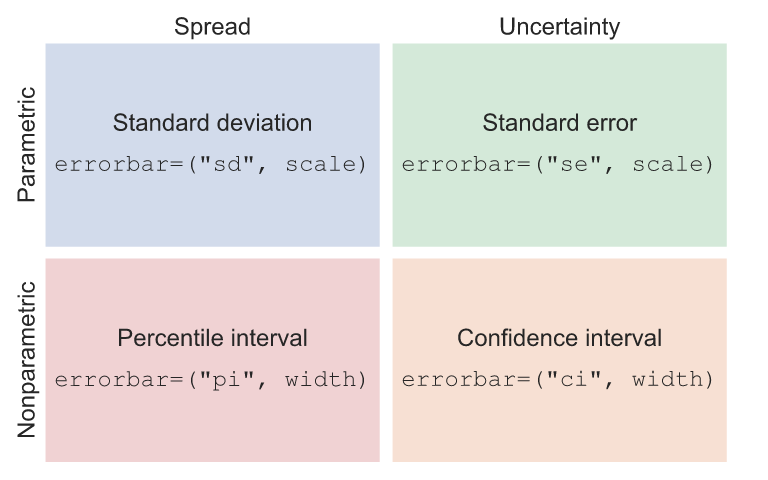

- 크기 매개변수는 모수적 접근과 비모수적 접근에서 각기 다르게 정의됨에 유의하십시오. 
- 모수적 오차 막대의 경우, 오차를 정의하는 통계량(표준 오차 또는 표준 편차)에 곱해지는 스칼라 인자입니다. 
- 비모수적 오차 막대의 경우, 백분위 폭입니다. 각 특정 접근 방법에 대해 자세히 설명되어 있습니다.

    - 여기에서 설명하는 errorbar API는 seaborn v0.12에서 소개되었습니다. 
    - 이전 버전에서는 ci 매개변수 (즉, ci=<size> 또는 ci="sd")로 제어되는 부트스트랩 신뢰 구간 또는 표준 편차만 표시하는 옵션만 있었습니다.

- 다른 매개변수화를 비교하기 위해 다음 보조 함수를 사용하겠습니다.

In [2]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])